# Compare best bowlers (measured by runs/wicket or runs/over) from India and Australia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
pd.set_option('chained_assignment',None)
np.seterr(divide='ignore', invalid='ignore')
%matplotlib notebook

# India's bowlers 

In [2]:
IB = pd.read_csv("india-bowling.csv")
dnd = np.array(IB["Overs"])
pos=np.squeeze(np.where(dnd=="DNB"))
ndf=IB[0:pos[0]]
ndf.head(5)
ndf.drop(['Player Link'], axis = 1, inplace = True)

In [3]:
ndf.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date
0,A Mishra,2,6.0,18,5,3.00,2,New Zealand,Visakhapatnam,29 Oct 2016
1,JJ Bumrah,2,10.0,27,5,2.70,1,Sri Lanka,Pallekele,27 Aug 2017
2,B Kumar,0,9.4,42,5,4.34,1,Sri Lanka,Colombo (RPS),3 Sep 2017
3,JJ Bumrah,1,10.0,22,4,2.20,1,Zimbabwe,Harare,15 Jun 2016
4,R Ashwin,1,10.0,25,4,2.50,1,U.A.E.,Perth,28 Feb 2015


In [4]:
# add extra column runs/wicket for every player

In [5]:
rns = np.array(ndf["Runs"])
rns = rns.astype("float")
wck = np.array(ndf['Wickets'])
wck = wck.astype("int")
rnsPwck = rns/wck
rnsPwck = pd.DataFrame(rnsPwck,columns=["runs/wck"])

In [6]:
tb = [ndf,rnsPwck]
tb = pd.concat(tb,axis=1)

In [7]:
tb.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date,runs/wck
0,A Mishra,2,6.0,18,5,3.00,2,New Zealand,Visakhapatnam,29 Oct 2016,3.60
1,JJ Bumrah,2,10.0,27,5,2.70,1,Sri Lanka,Pallekele,27 Aug 2017,5.40
2,B Kumar,0,9.4,42,5,4.34,1,Sri Lanka,Colombo (RPS),3 Sep 2017,8.40
3,JJ Bumrah,1,10.0,22,4,2.20,1,Zimbabwe,Harare,15 Jun 2016,5.50
4,R Ashwin,1,10.0,25,4,2.50,1,U.A.E.,Perth,28 Feb 2015,6.25


In [8]:
tb.columns

Index(['Player', 'Maidens', 'Overs', 'Runs', 'Wickets', 'Economy', 'Inns',
       'Opposition', 'Ground', 'Start Date', 'runs/wck'],
      dtype='object')

In [9]:
#dfAus = tb[tb["Opposition"]=="Australia"]
df1 = tb

In [10]:
df1 = df1.reset_index(drop=True)
df1.columns

Index(['Player', 'Maidens', 'Overs', 'Runs', 'Wickets', 'Economy', 'Inns',
       'Opposition', 'Ground', 'Start Date', 'runs/wck'],
      dtype='object')

In [11]:
df1.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date,runs/wck
0,A Mishra,2,6.0,18,5,3.00,2,New Zealand,Visakhapatnam,29 Oct 2016,3.60
1,JJ Bumrah,2,10.0,27,5,2.70,1,Sri Lanka,Pallekele,27 Aug 2017,5.40
2,B Kumar,0,9.4,42,5,4.34,1,Sri Lanka,Colombo (RPS),3 Sep 2017,8.40
3,JJ Bumrah,1,10.0,22,4,2.20,1,Zimbabwe,Harare,15 Jun 2016,5.50
4,R Ashwin,1,10.0,25,4,2.50,1,U.A.E.,Perth,28 Feb 2015,6.25


In [12]:
# remove inf
px = np.squeeze(np.where(df1["runs/wck"]==np.inf))
px

array([216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
       229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241,
       242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
       307, 308, 309, 310, 311, 312])

In [13]:
dfX1 = df1[0:px[0]]
dfX1.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date,runs/wck
0,A Mishra,2,6.0,18,5,3.00,2,New Zealand,Visakhapatnam,29 Oct 2016,3.60
1,JJ Bumrah,2,10.0,27,5,2.70,1,Sri Lanka,Pallekele,27 Aug 2017,5.40
2,B Kumar,0,9.4,42,5,4.34,1,Sri Lanka,Colombo (RPS),3 Sep 2017,8.40
3,JJ Bumrah,1,10.0,22,4,2.20,1,Zimbabwe,Harare,15 Jun 2016,5.50
4,R Ashwin,1,10.0,25,4,2.50,1,U.A.E.,Perth,28 Feb 2015,6.25


In [14]:
playername = dfX1.Player.unique()
playername

array(['A Mishra', 'JJ Bumrah', 'B Kumar', 'R Ashwin', 'UT Yadav',
       'Mohammed Shami', 'I Sharma', 'YS Chahal', 'KM Jadhav', 'HH Pandya',
       'STR Binny', 'AR Patel', 'Kuldeep Yadav', 'SK Raina', 'MM Sharma',
       'BB Sran', 'RA Jadeja', 'DS Kulkarni', 'Harbhajan Singh',
       'AT Rayudu', 'J Yadav', 'M Vijay', 'SN Thakur', 'R Dhawan'], dtype=object)

In [15]:
def PlayerWicketPerOver(p):
    tmpPlayer         = dfX1[dfX1["Player"]==p]
    tmpPlayer         = tmpPlayer.reset_index(drop=True)
    maxrunPwck        = np.max(np.array(tmpPlayer["runs/wck"]))
    totalrunPwck      = sum(np.array(tmpPlayer["runs/wck"]))
    return (maxrunPwck,totalrunPwck)

In [16]:
tbx=[]
for i in playername:
    [mxrpwck,wrpwck] = PlayerWicketPerOver(i)
    tbx.append([i,mxrpwck,wrpwck])

In [19]:
dfw = pd.DataFrame(tbx,columns=['player_name','max_runs/wicket','total_runs/wicket'])
dfw.head(5)

,player_name,max_runs/wicket,total_runs/wicket
0,A Mishra,55.0,200.433333
1,JJ Bumrah,68.0,380.316667
2,B Kumar,106.0,526.983333
3,R Ashwin,75.0,524.416667
4,UT Yadav,82.0,789.083333


In [20]:
def visualize(d1,d2,title,ylb):
    data = [go.Bar(
            x=np.array(dfw[d1]),
            y=np.array(dfw[d2])
            
    )]

    layout = go.Layout(
    
            title=title,
            xaxis=dict(
            title='Players_name',
            titlefont=dict(
            family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title=ylb,
            titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
            )
        )
    )
    
    return (data,layout)

In [22]:
[data,layout]=visualize('player_name',"max_runs/wicket",'max runs/wicket',"maximum runs/wicket")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='a')

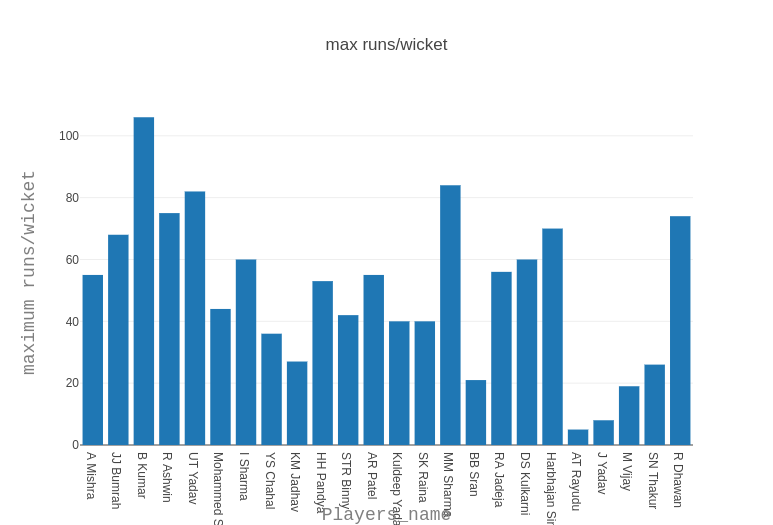

In [62]:
from IPython.display import Image
Image(filename='./images/a.png')

In [23]:
[data,layout]=visualize('player_name',"total_runs/wicket",'Total runs/wicket',"total runs/wicket")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='b')

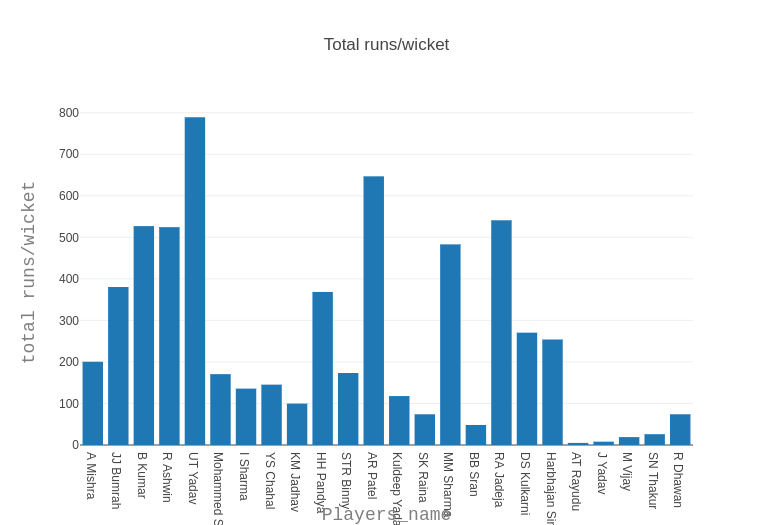

In [63]:
Image(filename='./images/b.png')

# Australia's bolwers

In [24]:
Au  = pd.read_csv("australia-bowling.csv")
dnd = np.array(Au["Overs"])
pos = np.squeeze(np.where(dnd=="DNB"))
adf = Au[0:pos[0]]
adf.head(5)
adf.drop(['Player Link'], axis = 1, inplace = True)

In [25]:
adf.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date
0,MA Starc,0,9.0,28,6,3.11,2,New Zealand,Auckland,28 Feb 2015
1,MA Starc,2,10.0,43,6,4.30,1,India,Melbourne,18 Jan 2015
2,JW Hastings,0,10.0,45,6,4.50,1,Sri Lanka,Dambulla,31 Aug 2016
3,JR Hazlewood,0,9.0,52,6,5.77,1,New Zealand,Birmingham,2 Jun 2017
4,MR Marsh,0,9.0,33,5,3.66,2,England,Melbourne,14 Feb 2015


In [26]:
# add extra column runs/wicket for every player

In [27]:
Arns = np.array(adf["Runs"])
Arns = Arns.astype("float")
Awck = np.array(adf['Wickets'])
Awck = Awck.astype("int")
ArnsPwck = Arns/Awck
ArnsPwck = pd.DataFrame(ArnsPwck,columns=["runs/wck"])

In [28]:
Atb = [adf,ArnsPwck]
Atb = pd.concat(Atb,axis=1)

In [29]:
Atb.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date,runs/wck
0,MA Starc,0,9.0,28,6,3.11,2,New Zealand,Auckland,28 Feb 2015,4.666667
1,MA Starc,2,10.0,43,6,4.30,1,India,Melbourne,18 Jan 2015,7.166667
2,JW Hastings,0,10.0,45,6,4.50,1,Sri Lanka,Dambulla,31 Aug 2016,7.500000
3,JR Hazlewood,0,9.0,52,6,5.77,1,New Zealand,Birmingham,2 Jun 2017,8.666667
4,MR Marsh,0,9.0,33,5,3.66,2,England,Melbourne,14 Feb 2015,6.600000


In [ ]:
#dfInd = Atb[Atb["Opposition"]=="India"]

In [30]:
df2 = Atb
df2.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date,runs/wck
0,MA Starc,0,9.0,28,6,3.11,2,New Zealand,Auckland,28 Feb 2015,4.666667
1,MA Starc,2,10.0,43,6,4.30,1,India,Melbourne,18 Jan 2015,7.166667
2,JW Hastings,0,10.0,45,6,4.50,1,Sri Lanka,Dambulla,31 Aug 2016,7.500000
3,JR Hazlewood,0,9.0,52,6,5.77,1,New Zealand,Birmingham,2 Jun 2017,8.666667
4,MR Marsh,0,9.0,33,5,3.66,2,England,Melbourne,14 Feb 2015,6.600000


In [31]:
df2 = df2.reset_index(drop=True)
df2.columns

Index(['Player', 'Maidens', 'Overs', 'Runs', 'Wickets', 'Economy', 'Inns',
       'Opposition', 'Ground', 'Start Date', 'runs/wck'],
      dtype='object')

In [32]:
df2.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date,runs/wck
0,MA Starc,0,9.0,28,6,3.11,2,New Zealand,Auckland,28 Feb 2015,4.666667
1,MA Starc,2,10.0,43,6,4.30,1,India,Melbourne,18 Jan 2015,7.166667
2,JW Hastings,0,10.0,45,6,4.50,1,Sri Lanka,Dambulla,31 Aug 2016,7.500000
3,JR Hazlewood,0,9.0,52,6,5.77,1,New Zealand,Birmingham,2 Jun 2017,8.666667
4,MR Marsh,0,9.0,33,5,3.66,2,England,Melbourne,14 Feb 2015,6.600000


In [33]:
# remove inf
pxx = np.squeeze(np.where(df2["runs/wck"]==np.inf))
pxx

array([233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245,
       246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258,
       259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271,
       272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284,
       285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297,
       298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310,
       311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323,
       324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336,
       337, 338, 339, 340, 341, 342, 343, 344])

In [34]:
dfX2 = df2[0:pxx[0]]
dfX2.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date,runs/wck
0,MA Starc,0,9.0,28,6,3.11,2,New Zealand,Auckland,28 Feb 2015,4.666667
1,MA Starc,2,10.0,43,6,4.30,1,India,Melbourne,18 Jan 2015,7.166667
2,JW Hastings,0,10.0,45,6,4.50,1,Sri Lanka,Dambulla,31 Aug 2016,7.500000
3,JR Hazlewood,0,9.0,52,6,5.77,1,New Zealand,Birmingham,2 Jun 2017,8.666667
4,MR Marsh,0,9.0,33,5,3.66,2,England,Melbourne,14 Feb 2015,6.600000


In [35]:
playernameAus  = dfX2.Player.unique()
playernameAus  

array(['MA Starc', 'JW Hastings', 'JR Hazlewood', 'MR Marsh',
       'KW Richardson', 'MG Johnson', 'JP Faulkner', 'PJ Cummins',
       'GJ Maxwell', 'NM Coulter-Nile', 'A Zampa', 'NM Lyon', 'JM Mennie',
       'MP Stoinis', 'CP Tremain', 'SM Boland', 'TM Head', 'SR Watson',
       'GS Sandhu', 'AC Agar', 'MJ Clarke', 'MC Henriques', 'XJ Doherty',
       'JS Paris', 'DJ Worrall', 'B Stanlake'], dtype=object)

In [36]:
def PlayerWicketPerOverAus(p):
    tmpPlayer         = dfX2[dfX2["Player"]==p]
    tmpPlayer         = tmpPlayer.reset_index(drop=True)
    maxrunPwck        = np.max(np.array(tmpPlayer["runs/wck"]))
    totalrunPwck      = sum(np.array(tmpPlayer["runs/wck"]))
    return (maxrunPwck,totalrunPwck)

In [37]:
tba=[]
for i in playernameAus:
    [mxrpwck,wrpwck] = PlayerWicketPerOverAus(i)
    tba.append([i,mxrpwck,wrpwck])

In [38]:
dfwAus = pd.DataFrame(tba,columns=['player_name','max_runs/wicket','total_runs/wicket'])
dfwAus.head(5)

,player_name,max_runs/wicket,total_runs/wicket
0,MA Starc,79.0,859.083333
1,JW Hastings,46.0,339.333333
2,JR Hazlewood,74.0,620.583333
3,MR Marsh,77.0,516.350000
4,KW Richardson,48.0,61.600000


In [39]:
def visualize(d1,d2,title,ylb):
    data = [go.Bar(
            x=np.array(dfwAus[d1]),
            y=np.array(dfwAus[d2])
            
    )]

    layout = go.Layout(
    
            title=title,
            xaxis=dict(
            title='Players_name',
            titlefont=dict(
            family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title=ylb,
            titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
            )
        )
    )
    
    return (data,layout)

In [41]:
[data,layout]=visualize('player_name',"max_runs/wicket",'max runs/wicket',"maximum runs/wicket")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='x')

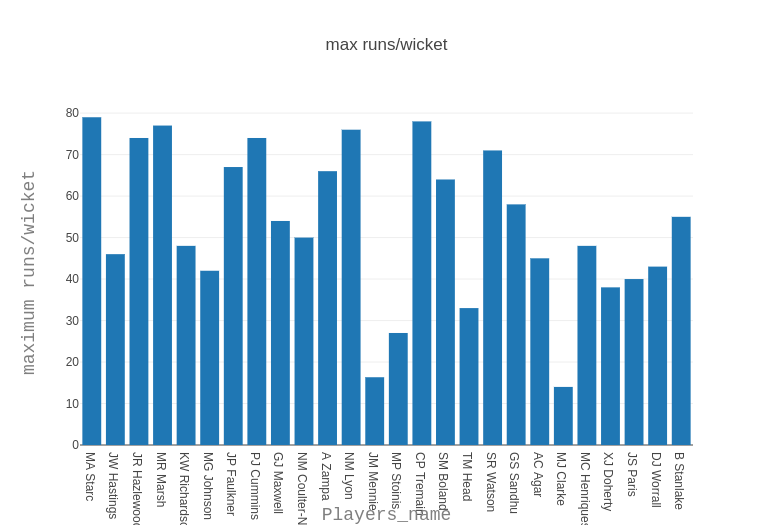

In [64]:
Image(filename='./images/c.png')

In [42]:
[data,layout]=visualize('player_name',"total_runs/wicket",'Total runs/wicket',"total runs/wicket")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='y')

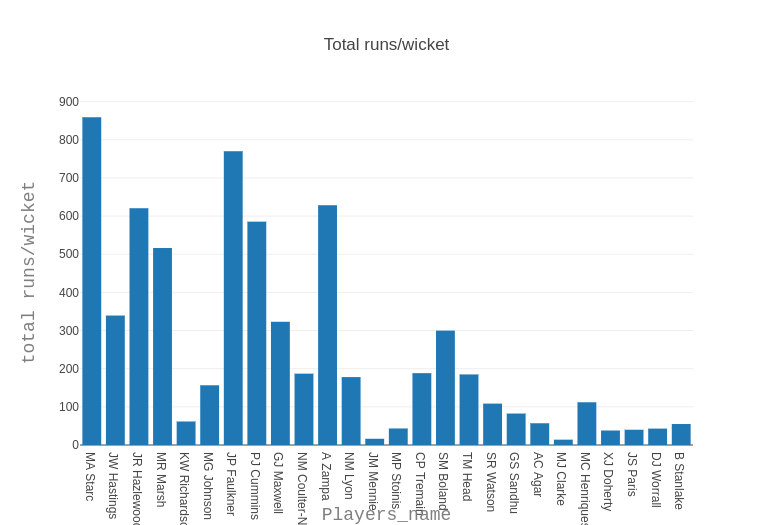

In [65]:
Image(filename='./images/d.png')

# Bowler Analysis India

In [43]:
IndPlayername = dfX1.Player.unique()

In [44]:
def compIND(i):    
    tmp             = dfX1[dfX1["Player"]==i]
    tmp             = tmp.reset_index(drop=True)
    totalInns       = sum(np.array(tmp["Inns"]).astype("int"))
    totalRuns       = sum(np.array(tmp["Runs"]).astype("int"))
    totalWicket     = sum(np.array(tmp["Wickets"].astype("int")))
    wickPnns        = (totalWicket/totalInns)
    runPwck         = (totalRuns/totalWicket)
    return (totalInns,totalRuns,totalWicket,wickPnns,runPwck )

In [45]:
tbInd=[]
for i in IndPlayername :
    [totalInns,totalRuns,totalWicket,wickPnns,runPwck] = compIND(i)
    tbInd.append([i,totalInns,totalRuns,totalWicket,wickPnns,runPwck ])

In [46]:
tbInd = pd.DataFrame(tbInd,columns=["players","totalInns","totalRuns","totalWicket",
                                    "wickPInns","runsPwck"])
tbInd

,players,totalInns,totalRuns,totalWicket,wickPInns,runsPwck
0,A Mishra,10,355,19,1.900000,18.684211
1,JJ Bumrah,22,704,42,1.909091,16.761905
2,B Kumar,27,719,32,1.185185,22.468750
3,R Ashwin,26,737,31,1.192308,23.774194
4,UT Yadav,34,1264,51,1.500000,24.784314
5,Mohammed Shami,14,349,23,1.642857,15.173913
6,I Sharma,6,250,9,1.500000,27.777778
7,YS Chahal,8,246,14,1.750000,17.571429
8,KM Jadhav,10,146,14,1.400000,10.428571
9,HH Pandya,18,548,25,1.388889,21.920000


In [47]:
thresholdInd = np.array(tbInd['totalInns'].astype("int"))
thresholdInd = np.floor(np.mean(thresholdInd))
thresholdInd

13.0

# Best bowler India

In [48]:
ti1 = tbInd.loc[tbInd['totalInns'] >= thresholdInd]
ti1.reset_index(drop=True)
ti1 = ti1.sort_values(['wickPInns'],ascending=[False])
ti1 = ti1.reset_index(drop=True)
ti1

,players,totalInns,totalRuns,totalWicket,wickPInns,runsPwck
0,JJ Bumrah,22,704,42,1.909091,16.761905
1,Mohammed Shami,14,349,23,1.642857,15.173913
2,UT Yadav,34,1264,51,1.500000,24.784314
3,HH Pandya,18,548,25,1.388889,21.920000
4,R Ashwin,26,737,31,1.192308,23.774194
5,B Kumar,27,719,32,1.185185,22.468750
6,MM Sharma,22,651,23,1.045455,28.304348
7,RA Jadeja,22,664,21,0.954545,31.619048
8,AR Patel,31,740,27,0.870968,27.407407


In [49]:
x11  = np.array(ti1['wickPInns'].astype("float"))
y11  = np.array(ti1['runsPwck'].astype("float"))
nInd = np.array(ti1['players'])

<IPython.core.display.Javascript object>


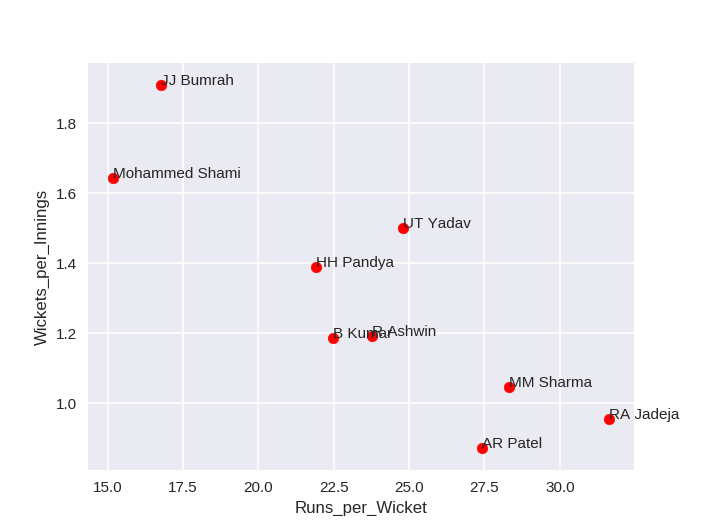

In [50]:
fig, ax = plt.subplots()
ax.scatter(y11,x11,color=['red'])

for i, txt in enumerate(nInd):
    ax.annotate(txt, (y11[i],x11[i]))
plt.xlabel("Runs_per_Wicket")
plt.ylabel("Wickets_per_Innings")

# Bowler Analysis Austrlia

In [51]:
AusPlayername = dfX2.Player.unique()

In [52]:
def compAUS(i):    
    tmp             = dfX2[dfX2["Player"]==i]
    tmp             = tmp.reset_index(drop=True)
    totalInns       = sum(np.array(tmp["Inns"]).astype("int"))
    totalRuns       = sum(np.array(tmp["Runs"]).astype("int"))
    totalWicket     = sum(np.array(tmp["Wickets"].astype("int")))
    wickPnns        = (totalWicket/totalInns)
    runPwck         = (totalRuns/totalWicket)
    return (totalInns,totalRuns,totalWicket,wickPnns,runPwck)

In [53]:
tbAus=[]
for i in AusPlayername:
    [totalInns,totalRuns,totalWicket,wickPnns,runPwck] = compAUS(i)
    tbAus.append([i,totalInns,totalRuns,totalWicket,wickPnns,runPwck])

In [54]:
tbAus = pd.DataFrame(tbAus,columns=["players","totalInns","totalRuns","totalWicket",
                                    "wickPInns","runPwck"])
tbAus

,players,totalInns,totalRuns,totalWicket,wickPInns,runPwck
0,MA Starc,53,1464,85,1.603774,17.223529
1,JW Hastings,17,669,34,2.000000,19.676471
2,JR Hazlewood,35,1049,54,1.542857,19.425926
3,MR Marsh,30,746,36,1.200000,20.722222
4,KW Richardson,3,116,6,2.000000,19.333333
5,MG Johnson,13,285,18,1.384615,15.833333
6,JP Faulkner,35,1229,52,1.485714,23.634615
7,PJ Cummins,31,930,41,1.322581,22.682927
8,GJ Maxwell,21,457,22,1.047619,20.772727
9,NM Coulter-Nile,12,297,14,1.166667,21.214286


In [55]:
thresholdAus = np.array(tbAus['totalInns'].astype("int"))
thresholdAus = np.floor(np.mean(thresholdAus))

In [56]:
thresholdAus

12.0

# Best bowlers Australia

In [57]:
ti2 = tbAus.loc[tbAus['totalInns'] >= thresholdInd]
ti2.reset_index(drop=True)
ti2 = ti2.sort_values(['wickPInns'],ascending=[False])
ti2 = ti2.reset_index(drop=True)
ti2

,players,totalInns,totalRuns,totalWicket,wickPInns,runPwck
0,JW Hastings,17,669,34,2.000000,19.676471
1,MA Starc,53,1464,85,1.603774,17.223529
2,JR Hazlewood,35,1049,54,1.542857,19.425926
3,JP Faulkner,35,1229,52,1.485714,23.634615
4,MG Johnson,13,285,18,1.384615,15.833333
5,PJ Cummins,31,930,41,1.322581,22.682927
6,A Zampa,29,908,37,1.275862,24.540541
7,MR Marsh,30,746,36,1.200000,20.722222
8,GJ Maxwell,21,457,22,1.047619,20.772727


In [58]:
x21  = np.array(ti2['wickPInns'].astype("float"))
y21  = np.array(ti2['runPwck'].astype("float"))
nAus = np.array(ti2['players'])

<IPython.core.display.Javascript object>


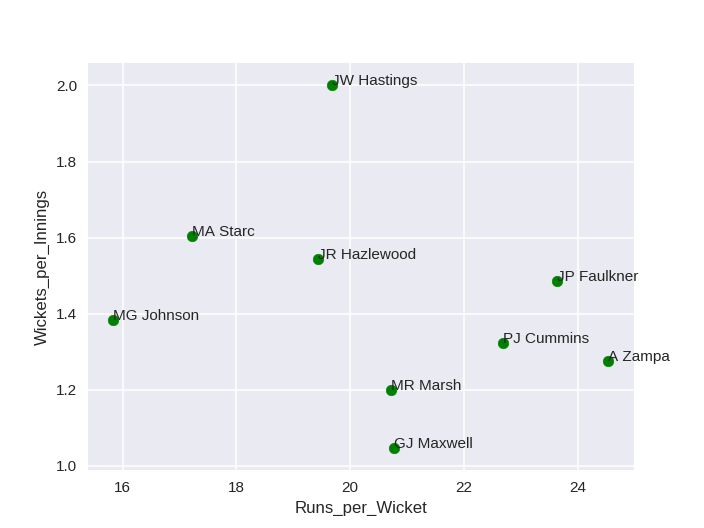

In [59]:
fig, ax = plt.subplots()
ax.scatter(y21,x21,color=['green'])

for i, txt in enumerate(nAus):
    ax.annotate(txt, (y21[i],x21[i]))
plt.xlabel("Runs_per_Wicket")
plt.ylabel("Wickets_per_Innings")

# Comparism

In [60]:
X = np.concatenate((x11,x21))
Y = np.concatenate((y11,y21))
Z = np.concatenate((nInd,nAus))

<IPython.core.display.Javascript object>


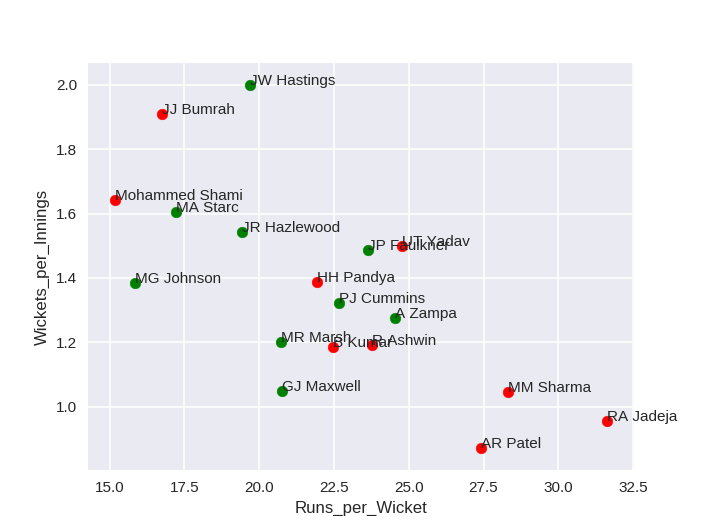

In [61]:
fig, ax = plt.subplots()
#ax.scatter(Y,X)
ax.scatter(y21,x21,color=['green'])
ax.scatter(y11,x11,color=['red'])

for i, txt in enumerate(Z):
    ax.annotate(txt, (Y[i],X[i]))
plt.xlabel("Runs_per_Wicket")
plt.ylabel("Wickets_per_Innings")